In [266]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [267]:
#read the dataset
df=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [268]:
#size of the dataset
df.shape

(1470, 35)

In [269]:
df.head(1)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5


In [270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [271]:
#dropping irrelevant columns
columns_to_drop=['EmployeeCount','EmployeeNumber','Over18','DailyRate','HourlyRate','RelationshipSatisfaction','MonthlyRate','StandardHours',]
df.drop(columns=columns_to_drop,inplace=True)

In [272]:
#checking for null values in any column
df.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EnvironmentSatisfaction    0
Gender                     0
JobInvolvement             0
JobLevel                   0
JobRole                    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
OverTime                   0
PercentSalaryHike          0
PerformanceRating          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
WorkLifeBalance            0
YearsAtCompany             0
YearsInCurrentRole         0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

There are no null values

### Exploratory Data Analysis

/Users/anmolagrawal/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


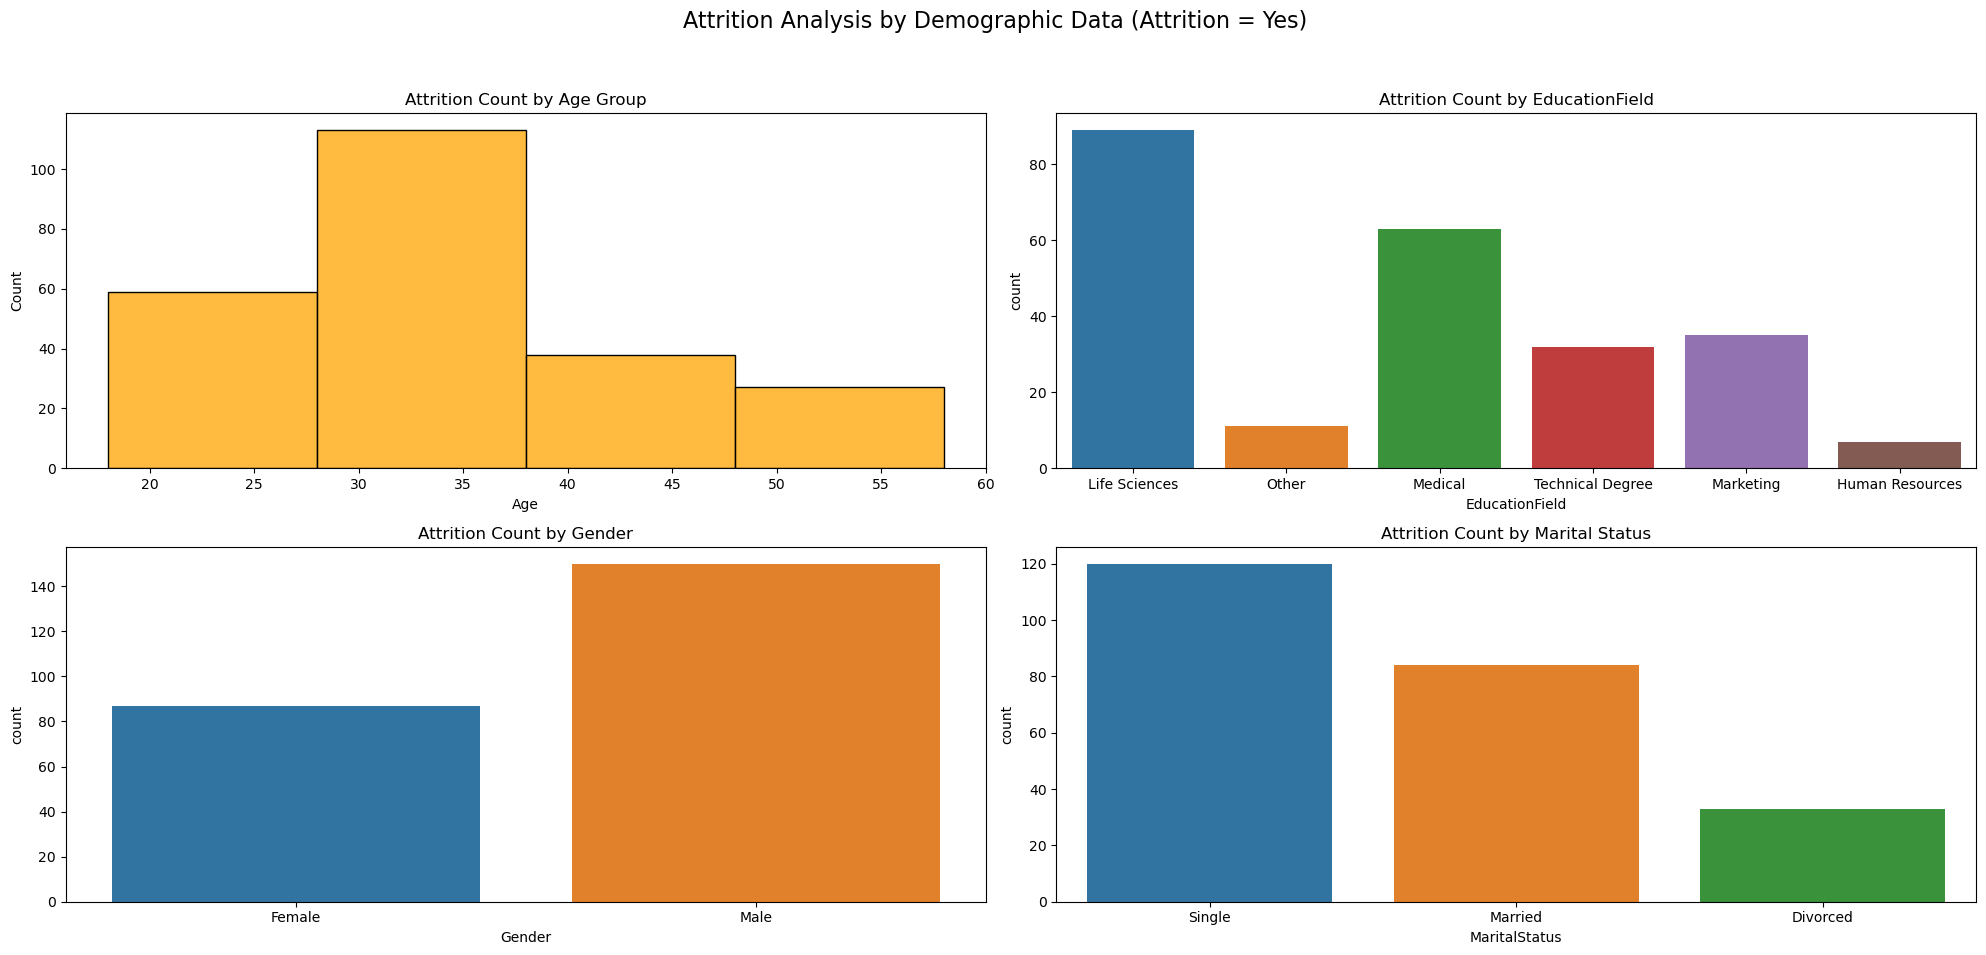

In [273]:
# Filter the DataFrame for Attrition 'Yes'
df_attrition_yes = df[df['Attrition'] == 'Yes']

fig, axes = plt.subplots(2, 2, figsize=(20, 10))  # Adjust the size and layout as needed
fig.suptitle('Attrition Analysis by Demographic Data (Attrition = Yes)', fontsize=16)
sns.histplot(data=df_attrition_yes, x="Age", binwidth=10, color='orange',ax=axes[0, 0])
axes[0, 0].set_title('Attrition Count by Age Group')

sns.countplot(x='EducationField', data=df_attrition_yes, ax=axes[0, 1])
axes[0, 1].set_title('Attrition Count by EducationField')

sns.countplot(x='Gender', data=df_attrition_yes, ax=axes[1, 0])
axes[1, 0].set_title('Attrition Count by Gender')

sns.countplot(x='MaritalStatus', data=df_attrition_yes, ax=axes[1, 1])
axes[1, 1].set_title('Attrition Count by Marital Status')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the layout to make room for the title
plt.show()

#### Insights
1. <b>Attrition Count by Age Group:</b> The highest attrition count is among the younger employees, particularly those in their late 20s to early 30s. This could suggest that younger employees are either exploring different opportunities or are not yet settled in their careers. There is a noticeable decline in attrition as age increases, which may imply that older employees have higher job stability or satisfaction.

2. <b>Attrition Count by Gender:</b> The attrition count for males is significantly higher than for females.

3. <b>Attrition Count by Marital Status</b> Single employees show higher attrition than their married or divorced counterparts. This could be due to life-stage factors where single employees have fewer family commitments and may seek or be open to more job mobility.

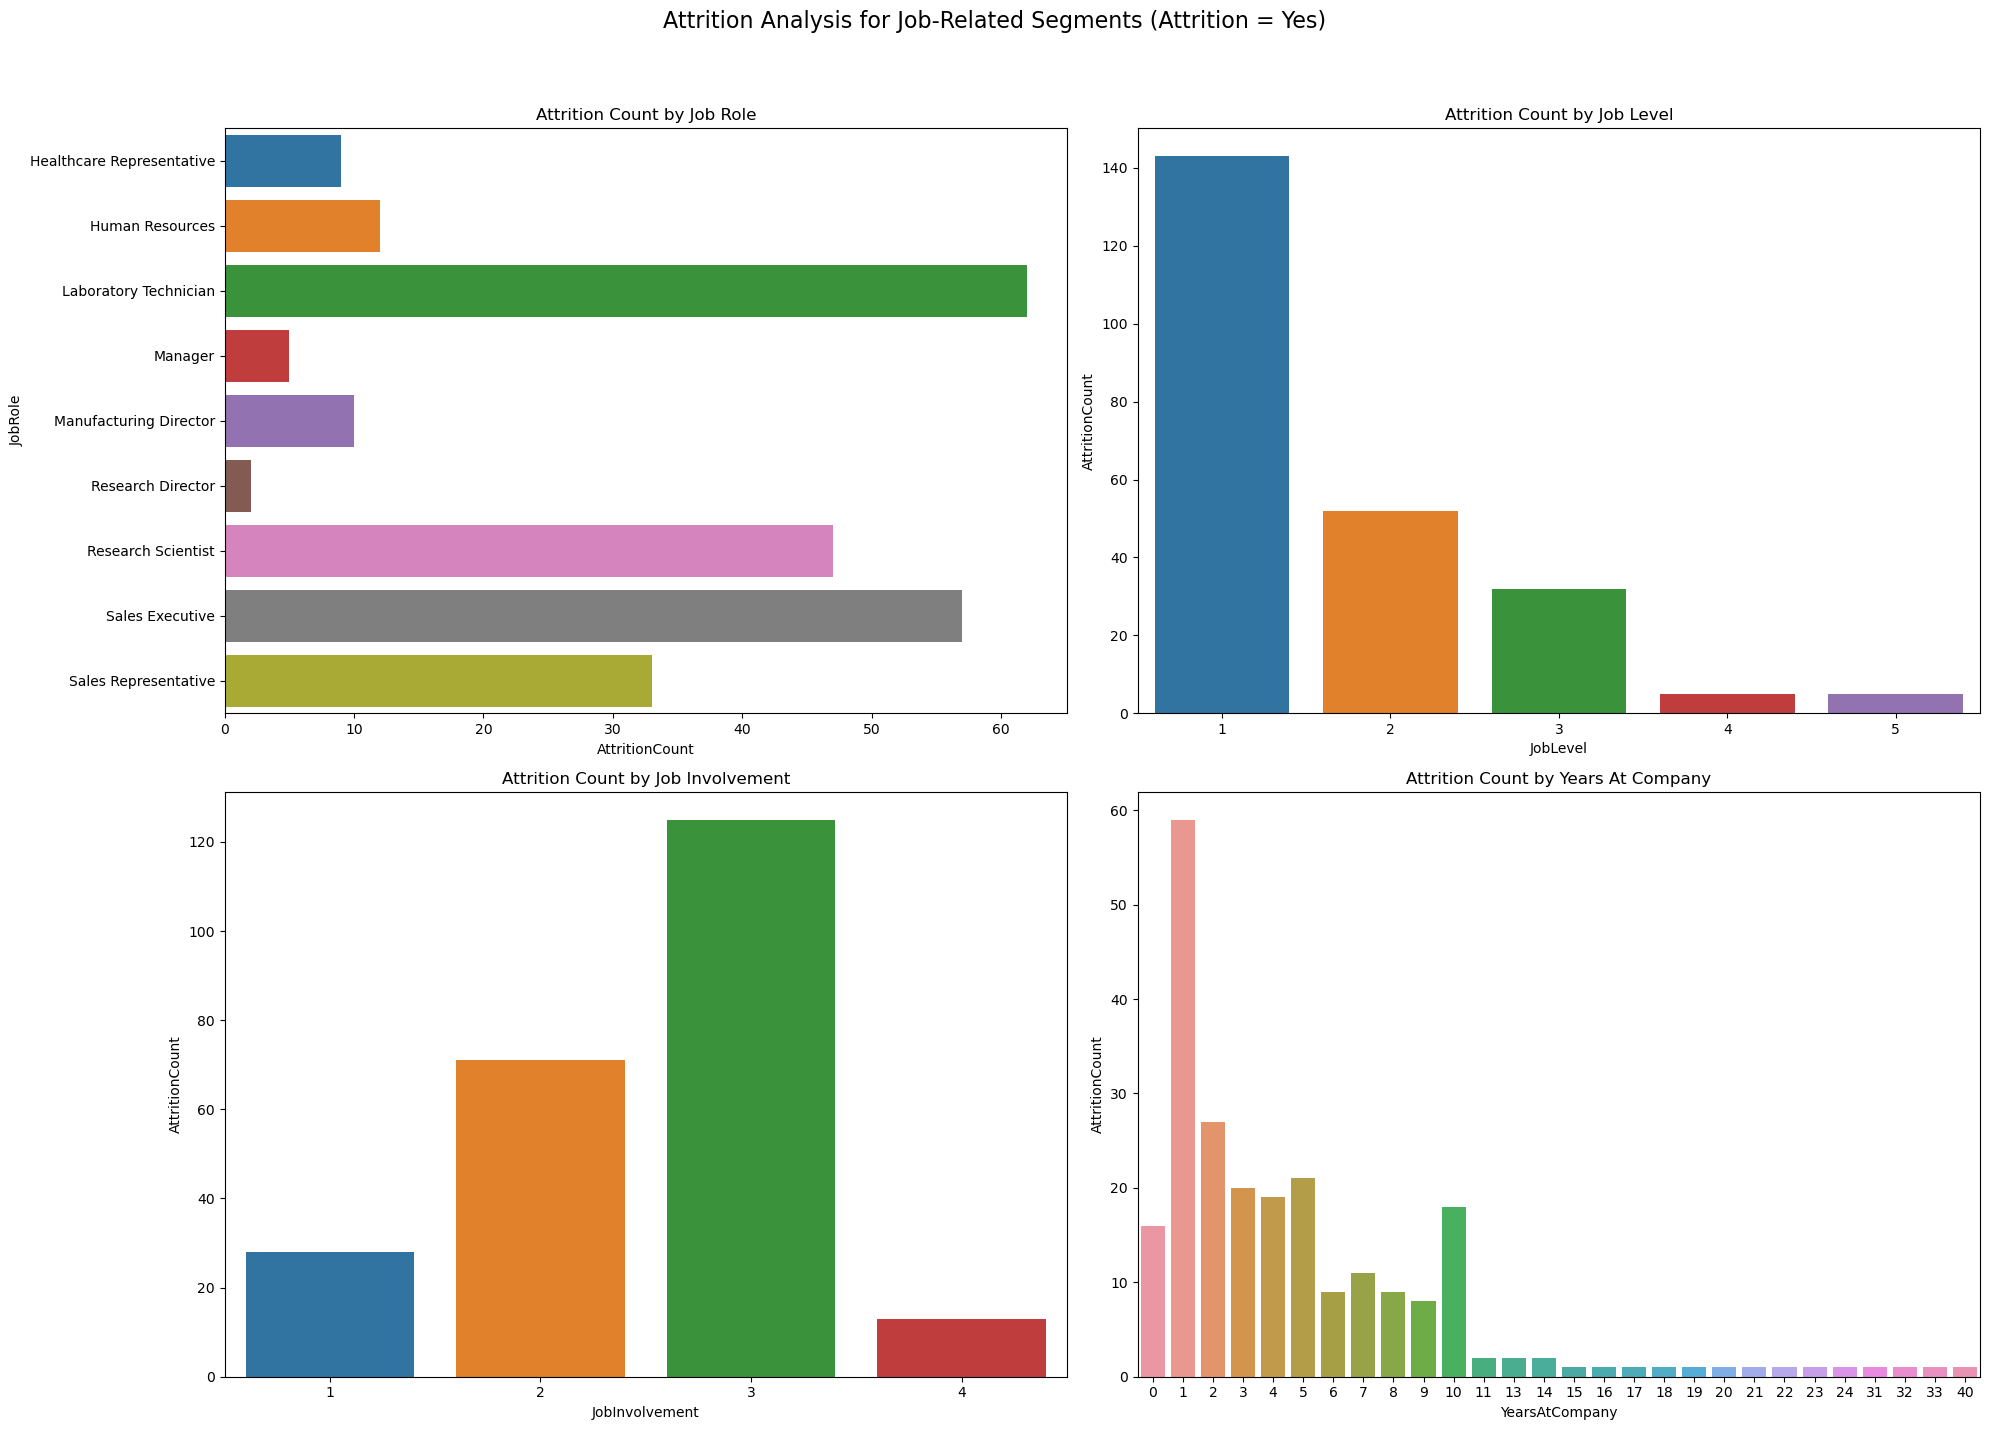

In [274]:

job_role_attrition = df[df['Attrition'] == 'Yes'].groupby('JobRole').size().reset_index(name='AttritionCount')

# Group by 'JobLevel' and calculate the attrition count
job_level_attrition = df[df['Attrition'] == 'Yes'].groupby('JobLevel').size().reset_index(name='AttritionCount')

# Group by 'JobInvolvement' and calculate the attrition count
job_involvement_attrition = df[df['Attrition'] == 'Yes'].groupby('JobInvolvement').size().reset_index(name='AttritionCount')

# Group by 'YearsAtCompany' and calculate the attrition count
years_at_company_attrition = df[df['Attrition'] == 'Yes'].groupby('YearsAtCompany').size().reset_index(name='AttritionCount')

# Now create visualizations for job-related attrition
fig, axes = plt.subplots(2, 2, figsize=(20, 15))  # Adjust the size and layout as needed
fig.suptitle('Attrition Analysis for Job-Related Segments (Attrition = Yes)', fontsize=16)

# Plot 1: Attrition Count by Job Role
sns.barplot(x='AttritionCount', y='JobRole', data=job_role_attrition, ax=axes[0, 0])
axes[0, 0].set_title('Attrition Count by Job Role')

# Plot 2: Attrition Count by Job Level
sns.barplot(x='JobLevel', y='AttritionCount', data=job_level_attrition, ax=axes[0, 1])
axes[0, 1].set_title('Attrition Count by Job Level')

# Plot 3: Attrition Count by Job Involvement
sns.barplot(x='JobInvolvement', y='AttritionCount', data=job_involvement_attrition, ax=axes[1, 0])
axes[1, 0].set_title('Attrition Count by Job Involvement')

# Plot 4: Attrition Count by Years At Company
sns.barplot(x='YearsAtCompany', y='AttritionCount', data=years_at_company_attrition, ax=axes[1, 1])
axes[1, 1].set_title('Attrition Count by Years At Company')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the layout to make room for the title
plt.show()


#### Insights
1. <b>Attrition Count by Job Level</b> Lower job levels (1 and 2) experience much higher attrition compared to higher job levels. This could suggest that entry-level or lower-tier positions are less satisfied or are more prone to leaving the company.

2. <b>Attrition Count by Job Involvement:</b> There's a peak at job involvement level '3', indicating that employees with a moderate level of job involvement are leaving the company more than those with very high or low involvement.

3. <b>Attrition Count by Years at Company:</b> A large number of employees leave within the first few years at the company, with a sharp peak for those who have been at the company for just 1 year. This suggests that the first year is critical for employee retention. The attrition count decreases as tenure increases, indicating that employees are more likely to stay with the company as they accumulate years of service. This might reflect a growing commitment or increased satisfaction with the company over time.

/Users/anmolagrawal/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


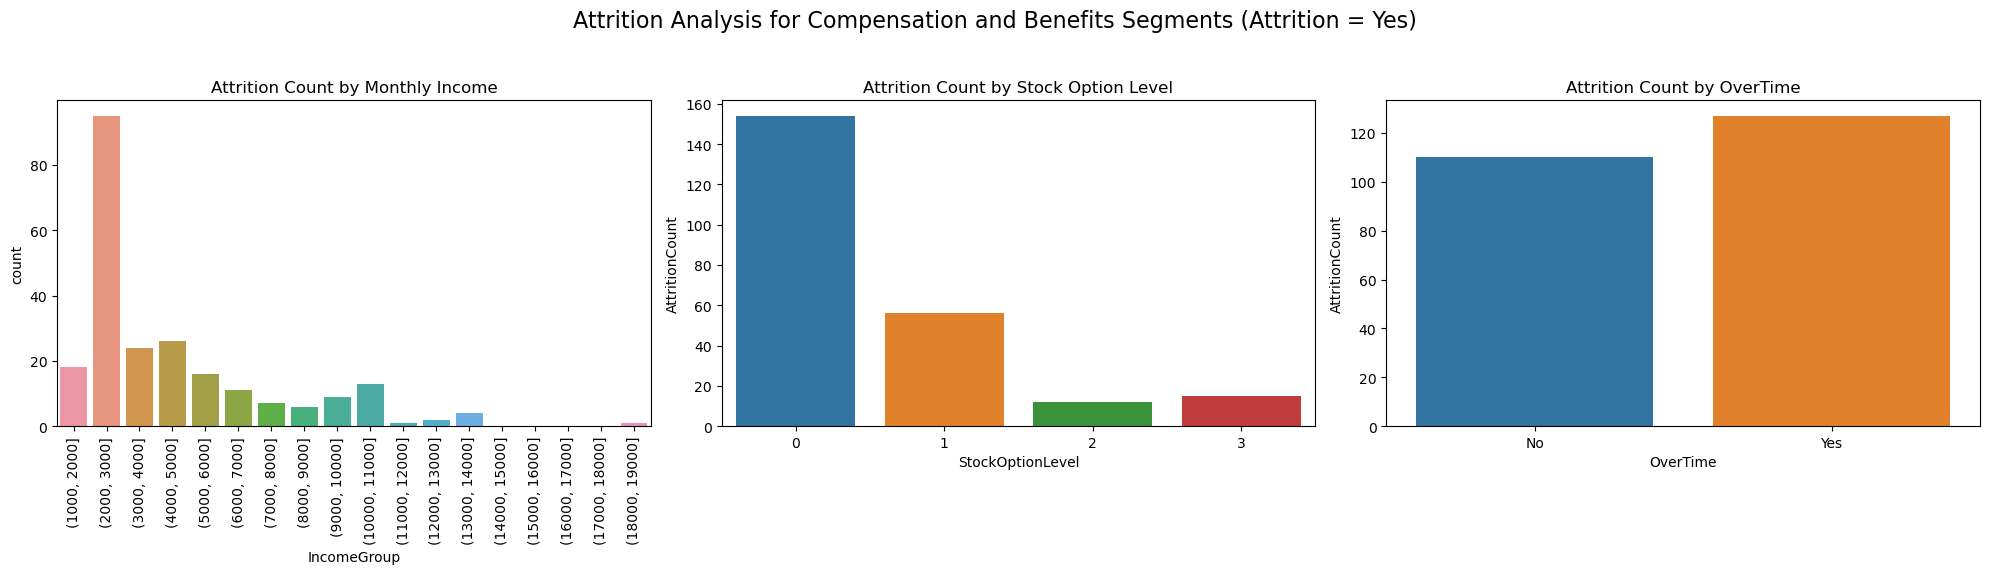

In [275]:
# Group by 'MonthlyIncome' and calculate the attrition count
monthly_income_attrition = df[df['Attrition'] == 'Yes'].groupby('MonthlyIncome').size().reset_index(name='AttritionCount')

# Group by 'StockOptionLevel' and calculate the attrition count
stock_option_level_attrition = df[df['Attrition'] == 'Yes'].groupby('StockOptionLevel').size().reset_index(name='AttritionCount')

# Group by 'OverTime' and calculate the attrition count
overtime_attrition = df[df['Attrition'] == 'Yes'].groupby('OverTime').size().reset_index(name='AttritionCount')

# Now create visualizations for compensation and benefits-related attrition
fig, axes = plt.subplots(1, 3, figsize=(20, 6))  # Adjust the size and layout as needed
fig.suptitle('Attrition Analysis for Compensation and Benefits Segments (Attrition = Yes)', fontsize=16)

# Plot 1: Attrition Count by Monthly Income
# We'll use bins for monthly income to make the plot more readable
income_bins = range(1000, 20000, 1000)
df['IncomeGroup'] = pd.cut(df['MonthlyIncome'], bins=income_bins)
sns.countplot(x='IncomeGroup', data=df[df['Attrition'] == 'Yes'], ax=axes[0])
axes[0].set_title('Attrition Count by Monthly Income')
axes[0].tick_params(axis='x', rotation=90)

# Plot 2: Attrition Count by Stock Option Level
sns.barplot(x='StockOptionLevel', y='AttritionCount', data=stock_option_level_attrition, ax=axes[1])
axes[1].set_title('Attrition Count by Stock Option Level')

# Plot 3: Attrition Count by OverTime
sns.barplot(x='OverTime', y='AttritionCount', data=overtime_attrition, ax=axes[2])
axes[2].set_title('Attrition Count by OverTime')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the layout to make room for the title
plt.show()


#### Insights
1. <b>Attrition Count by Monthly Income:</b> There's a significant number of employees leaving at the lower end of the monthly income spectrum. This could suggest that employees may leave in search of better-paying opportunities, highlighting the importance of competitive compensation packages in employee retention.
The attrition count decreases as the monthly income increases, which could imply that higher-income employees have more incentives to stay.

2. <b>Attrition Count by Stock Option Level:</b> Employees with no stock options (level 0) have the highest attrition count. This suggests that stock options may be an effective benefit for retaining employees.

3. <b>Attrition Count by Overtime:</b> Employees who work overtime show a higher attrition count than those who do not. This could indicate that work-life balance is a significant factor in an employee’s decision to stay with or leave the company.

### Data Preprocessing

Since our dataset contains categorical variables, we need to encode them.
Encoding categorical variables is a necessary preprocessing step because most machine learning algorithms require input data to be numerical.


In [276]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [277]:
num_columns = ['Age', 'DistanceFromHome','MonthlyIncome','NumCompaniesWorked','PercentSalaryHike','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']  # Replace with the names of your integer columns
categorical_columns = ['Attrition', 'BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime','']  # Replace with the names of your categorical columns
ordinal_columns = ['Education','EnvironmentSatisfaction','JobInvolvement','JobLevel','JobSatisfaction','PerformanceRating','WorkLifeBalance']  # Replace with the names of your ordinal columns

In [278]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler

# Define the column lists
num_columns = ['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
categorical_columns = ['Attrition','BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
ordinal_columns = ['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'PerformanceRating', 'WorkLifeBalance']

# Define the transformers
onehot_transformer = OneHotEncoder(handle_unknown='ignore')
ordinal_transformer = OrdinalEncoder()
num_transformer = StandardScaler()


# Create the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_columns), #scaling the numerical features increased my accuracy from 86% to 87.75.5%
        ('cat', onehot_transformer, categorical_columns),
        ('ord', ordinal_transformer, ordinal_columns)
    ])

# Apply the transformations
df_transformed = preprocessor.fit_transform(df)

# Manually create feature names for the one-hot encoded columns
feature_names = []
for col, categories in zip(categorical_columns, preprocessor.named_transformers_['cat'].categories_):
    for category in categories:
        feature_names.append(f'{col}_{category}')

# Combine with numerical and ordinal column names
all_feature_names = num_columns + feature_names + ordinal_columns

# Convert the transformed data back to a DataFrame
df_transformed = pd.DataFrame(df_transformed, columns=all_feature_names)

# Display the first few rows of the transformed DataFrame
df_transformed.head()


,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,...,MaritalStatus_Single,OverTime_No,OverTime_Yes,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,PerformanceRating,WorkLifeBalance
0,0.446350,-1.010909,-0.108350,2.125136,-1.150554,-0.932014,-0.421642,-2.171982,-0.164613,-0.063296,...,1.0,0.0,1.0,1.0,1.0,2.0,1.0,3.0,0.0,0.0
1,1.322365,-0.147150,-0.291719,-0.678049,2.129306,0.241988,-0.164511,0.155707,0.488508,0.764998,...,0.0,1.0,0.0,0.0,2.0,1.0,1.0,1.0,1.0,2.0
2,0.008343,-0.887515,-0.937654,1.324226,-0.057267,-0.932014,-0.550208,0.155707,-1.144294,-1.167687,...,1.0,0.0,1.0,1.0,3.0,1.0,0.0,2.0,0.0,2.0
3,-0.429664,-0.764121,-0.763634,-0.678049,-1.150554,-0.932014,-0.421642,0.155707,0.161947,0.764998,...,0.0,0.0,1.0,3.0,3.0,2.0,0.0,2.0,0.0,2.0
4,-1.086676,-0.887515,-0.644858,2.525591,-0.877232,0.241988,-0.678774,0.155707,-0.817734,-0.615492,...,0.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,2.0


### Modeling using Logistic Regression

Accuracy of Logistic Regression Model: 0.873015873015873
Precision: 0.5610
Recall: 0.3770
F1 Score: 0.4510


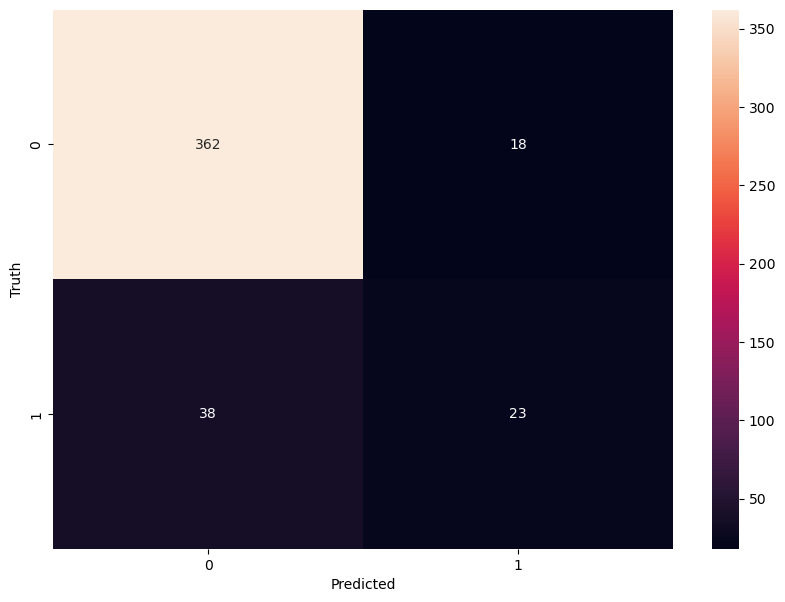

In [291]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score

y = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
X = df_transformed.drop(['Attrition_Yes', 'Attrition_No'], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression( random_state=42)
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print evaluation metrics
print('Accuracy of Logistic Regression Model:',accuracy)
f1 = f1_score(y_test, y_pred, zero_division=1)
precision = precision_score(y_test, y_pred, zero_division=1)
recall = recall_score(y_test, y_pred, zero_division=1)

# Print the F1 score, precision, and recall
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [295]:
# First, we'll extract the feature coefficients from the trained Logistic Regression model
# Then we'll aggregate the coefficients for encoded features back to the original feature

# Get the coefficients from the logistic regression model
coefficients = model.coef_[0]

# Create a DataFrame for the coefficients
feature_names = X_train.columns
coefficients_df = pd.DataFrame(coefficients, index=feature_names, columns=['Coefficient'])

# Aggregate the coefficients for the one-hot encoded features
# We'll assume that the original categorical features were separated by underscores
aggregated_coefficients = {}
for feature in feature_names:
    # The original feature name is the part before the first underscore '_'
    original_feature = feature.split('_')[0]
    # Add the absolute value of the coefficient to the corresponding original feature
    if original_feature in aggregated_coefficients:
        aggregated_coefficients[original_feature] += abs(coefficients_df.loc[feature, 'Coefficient'])
    else:
        aggregated_coefficients[original_feature] = abs(coefficients_df.loc[feature, 'Coefficient'])

# Convert the dictionary of aggregated coefficients to a DataFrame
aggregated_coefficients_df = pd.DataFrame(list(aggregated_coefficients.items()), columns=['Feature', 'AggregatedCoefficient'])

# Sort the DataFrame by the aggregated coefficients in descending order
aggregated_coefficients_df.sort_values(by='AggregatedCoefficient', ascending=False, inplace=True)

# Display the sorted aggregated coefficients DataFrame
aggregated_coefficients_df.reset_index(drop=True, inplace=True)
aggregated_coefficients_df

,Feature,AggregatedCoefficient
0,JobRole,3.877291
1,EducationField,2.494842
2,OverTime,1.979681
3,BusinessTravel,1.834289
4,MaritalStatus,1.697840
5,TotalWorkingYears,0.667396
6,YearsInCurrentRole,0.643061
7,YearsAtCompany,0.607987
8,Department,0.604221
9,NumCompaniesWorked,0.567575


<b>In an imbalanced classification scenario like predicting employee attrition, where the positive class ('Attrition = Yes') is much less frequent than the negative class ('Attrition = No'), traditional accuracy is not the best metric to assess model performance. This is because a model could simply predict the most common class for all instances and still achieve high accuracy, which is not helpful.</b>

Here are more appropriate metrics for assessing model performance in this scenario:

<b>1. Precision</b>
<b>2. Recall</b>
<b>3. F1 Score</b>

### Modeling using Logestic Regression by account for class Imbalance


<b>When dealing with imbalanced datasets, where the number of instances in one class significantly outnumbers the instances in the other class, accuracy alone can be misleading. In such scenarios, a model might predict the majority class for all instances and still achieve high accuracy, but this is not useful for our predictive purposes.</b>

<b>Altering the Class Weights: Many machine learning algorithms allow you to adjust the weights for different classes. In logistic regression, you can set the class_weight parameter to 'balanced' to adjust weights inversely proportional to class frequencies.</b>

Accuracy is class balanced Logistic Regression is : 0.7619047619047619
Precision: 0.3226
Recall: 0.6557
F1 Score: 0.4324


/Users/anmolagrawal/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


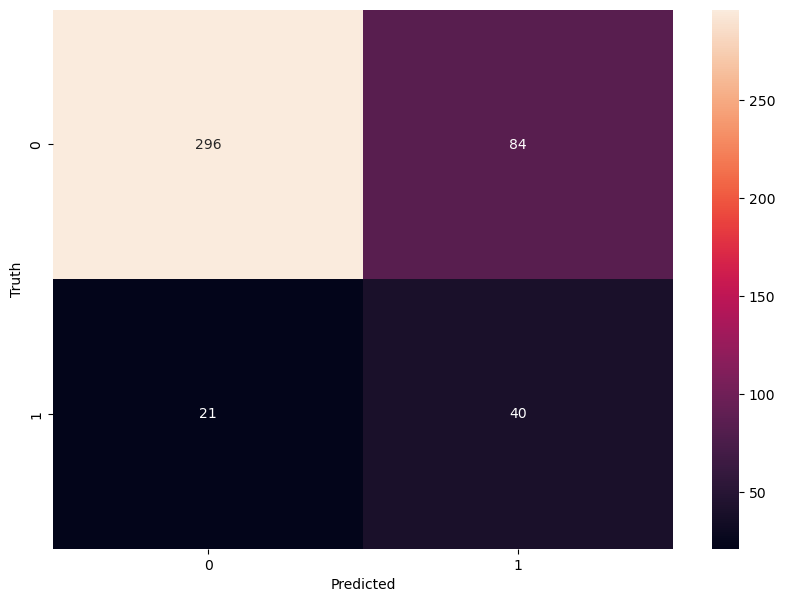

In [281]:
# Initialize and train the logistic regression model with balanced class weights
logreg_model_balanced = LogisticRegression(random_state=42, class_weight='balanced')
logreg_model_balanced.fit(X_train, y_train)

# Make predictions and evaluate the model using balanced class weights
y_pred_balanced = logreg_model_balanced.predict(X_test)
y_pred_proba_balanced = logreg_model_balanced.predict_proba(X_test)[:, 1]
accuracy_balanced = accuracy_score(y_test, y_pred_balanced)
#roc_auc_balanced = roc_auc_score(y_test, y_pred_proba_balanced)
classification_rep_balanced = classification_report(y_test, y_pred_balanced)

# Print evaluation metrics for the balanced model
print("Accuracy is class balanced Logistic Regression is :", accuracy_balanced)
f1 = f1_score(y_test, y_pred_balanced, zero_division=1)
precision = precision_score(y_test, y_pred_balanced, zero_division=1)
recall = recall_score(y_test, y_pred_balanced, zero_division=1)
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
#classification_rep_balanced
cm_balanced = confusion_matrix(y_test, y_pred_balanced)
#classification_rep
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm_balanced, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

<b>When we use class_weight='balanced' in a logistic regression model to account for an imbalanced dataset, it's common to see the overall accuracy decrease. This is because the model is no longer biased towards the majority class and starts making more predictions for the minority class, which is usually underrepresented in the dataset.</b>

<b>However, even though the overall accuracy might decrease, this does not mean the model's performance is worse. On the contrary, the model may now be more useful because it can better identify instances of the minority class.
Observe that confusion matrix has better predictions for Attrition=1 now.</b>

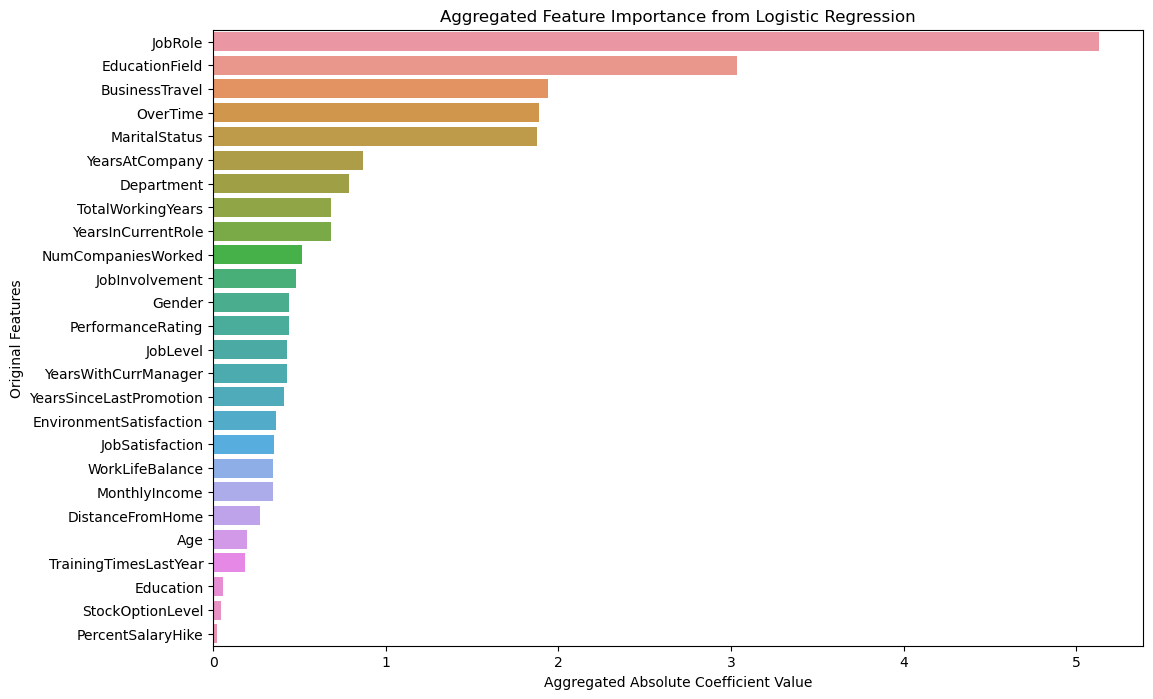

In [287]:
# Create a dictionary to hold the sum of importances for the original features
original_importances = {}

# Go through the feature importances and aggregate them for each original feature
for feature in feature_importance.index:
    # Split the feature name on '_' and take the first part to get the original feature name
    original_feature = feature.split('_')[0]
    
    # If the original feature is already in the dictionary, add the importance
    if original_feature in original_importances:
        original_importances[original_feature] += feature_importance.loc[feature, 'Absolute_Coefficient']
    else:
        # If not, create a new entry in the dictionary
        original_importances[original_feature] = feature_importance.loc[feature, 'Absolute_Coefficient']

# Now, create a DataFrame from this dictionary
original_feature_importances = pd.DataFrame(list(original_importances.items()), columns=['Original_Feature', 'Aggregated_Importance'])

# Sort the DataFrame by the aggregated importances
original_feature_importances = original_feature_importances.sort_values(by='Aggregated_Importance', ascending=False)

# Plot the aggregated feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Aggregated_Importance', y='Original_Feature', data=original_feature_importances)
plt.title('Aggregated Feature Importance from Logistic Regression')
plt.xlabel('Aggregated Absolute Coefficient Value')
plt.ylabel('Original Features')
plt.show()

In [288]:
# Assuming you have a logistic regression model and a DataFrame of features and coefficients
# First, we'll create a series of the coefficients from the logistic regression model
coefficients = pd.Series(logreg_model_balanced.coef_[0], index=X_train.columns)

# Now, create a new DataFrame to sum the coefficients of the one-hot encoded features
aggregated_coefficients = {}

# Iterate over the coefficients
for feature, coef in coefficients.items():
    # The original feature name is derived by splitting on the underscore
    # (assuming that one-hot encoding created feature names in the format "FeatureName_Value")
    original_feature = feature.split('_')[0]
    # Sum the absolute values of the coefficients
    if original_feature in aggregated_coefficients:
        aggregated_coefficients[original_feature] += abs(coef)
    else:
        aggregated_coefficients[original_feature] = abs(coef)

# Convert the aggregated coefficients dictionary to a DataFrame
aggregated_coefficients_df = pd.DataFrame(list(aggregated_coefficients.items()), columns=['Feature', 'AggregatedCoefficient'])

# Sort the DataFrame by the aggregated coefficients in descending order
aggregated_coefficients_df = aggregated_coefficients_df.sort_values(by='AggregatedCoefficient', ascending=False)

# Print the sorted DataFrame
print(aggregated_coefficients_df)

                    Feature  AggregatedCoefficient
16                  JobRole               5.130669
14           EducationField               3.034185
12           BusinessTravel               1.941193
18                 OverTime               1.887444
17            MaritalStatus               1.876887
8            YearsAtCompany               0.868503
13               Department               0.786948
6         TotalWorkingYears               0.684935
9        YearsInCurrentRole               0.681452
3        NumCompaniesWorked               0.516669
21           JobInvolvement               0.482657
15                   Gender               0.441497
24        PerformanceRating               0.438859
22                 JobLevel               0.429329
11     YearsWithCurrManager               0.427245
10  YearsSinceLastPromotion               0.409444
20  EnvironmentSatisfaction               0.366160
23          JobSatisfaction               0.351069
25          WorkLifeBalance    

1. Job Role is the Most Influential: The feature 'JobRole' has the highest aggregated coefficient, making it the most influential feature in predicting employee attrition according to this model. This suggests that the role of an employee within the company is highly indicative of their likelihood to leave.

2. Education Field and Business Travel are also Important: The second and third most influential features are 'EducationField' and 'BusinessTravel', indicating that these aspects of an employee's profile are significant predictors of attrition.

3. OverTime and Marital Status: 'OverTime' and 'MaritalStatus' follow closely, which implies that employees who work overtime or have certain marital statuses are more likely to have different attrition rates.

### Modeling using Bagging

In [282]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize the base estimator
base_estimator = DecisionTreeClassifier(random_state=42)

# Initialize the Bagging Classifier
bagging_clf = BaggingClassifier(base_estimator=base_estimator, n_estimators=100, random_state=42)

# Train the Bagging Classifier
bagging_clf.fit(X_train, y_train)

# Evaluate the Bagging Classifier
y_pred_bagging = bagging_clf.predict(X_test)
print(classification_report(y_test, y_pred_bagging))

/Users/anmolagrawal/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.88      0.98      0.92       380
           1       0.50      0.15      0.23        61

    accuracy                           0.86       441
   macro avg       0.69      0.56      0.58       441
weighted avg       0.82      0.86      0.83       441



### Modeling using RandomForest

Precision: 0.5000
Recall: 0.0984
F1 Score: 0.1644


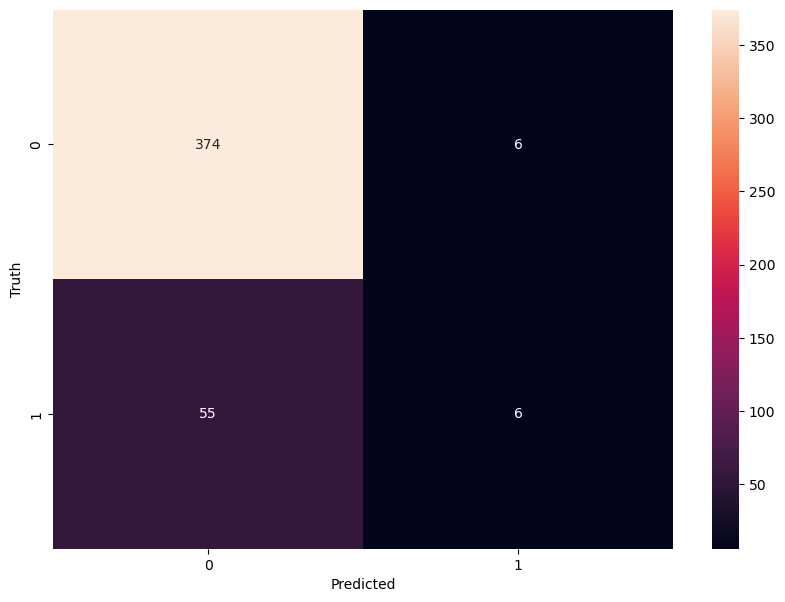

In [294]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest Classifier
rf_clf.fit(X_train, y_train)

# Evaluate the Random Forest Classifier
y_pred_rf = rf_clf.predict(X_test)


f1 = f1_score(y_test, y_pred_rf, zero_division=1)
precision = precision_score(y_test, y_pred_rf, zero_division=1)
recall = recall_score(y_test, y_pred_rf, zero_division=1)
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
#print(classification_report(y_test, y_pred_rf))

cm_rf = confusion_matrix(y_test, y_pred_rf)
#classification_rep
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm_rf, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [265]:
feature_scores = pd.Series(rf_clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

MonthlyIncome                        0.090126
Age                                  0.068856
TotalWorkingYears                    0.055613
YearsAtCompany                       0.050897
DistanceFromHome                     0.047519
NumCompaniesWorked                   0.040768
OverTime_No                          0.039484
YearsWithCurrManager                 0.039168
YearsInCurrentRole                   0.038323
PercentSalaryHike                    0.037429
EnvironmentSatisfaction              0.033442
StockOptionLevel                     0.032439
OverTime_Yes                         0.030295
JobSatisfaction                      0.029617
TrainingTimesLastYear                0.028802
YearsSinceLastPromotion              0.027030
WorkLifeBalance                      0.026977
MaritalStatus_Single                 0.026458
JobInvolvement                       0.025705
JobLevel                             0.022558
Education                            0.022131
BusinessTravel_Travel_Frequently  